### Comparison on OLS(Ordinary Least Squares) and TLS(Total Least Squares)

Last Singular Value = 1.6026187147117912 1.429893130177255
Ax = y
Noise added to A [Forward Operator] = N(0, 0.05) and y [True Data] = N(0, 0.5)
True values: y0 = 5, u = 10, a = -9.8
TLS fitted values: y0 = 3.137, u = 10.804, a = -9.894
OLS Fitted values: y0 = 2.476, u = 10.788, a = -9.887


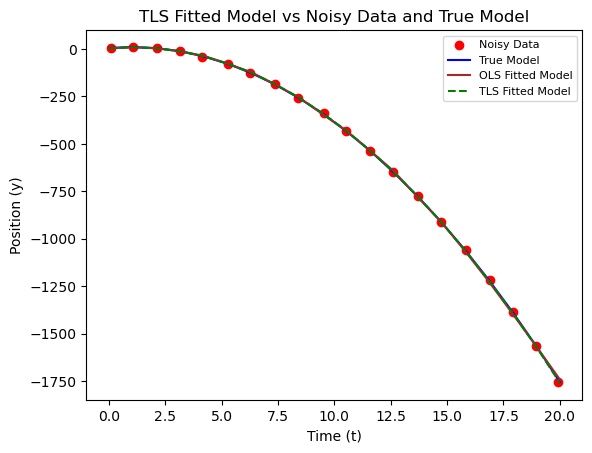

Last Singular Value = 4.031609094556596 1.5721219480371944
Ax = y
Noise added to A [Forward Operator] = N(0, 0.05) and y [True Data] = N(0, 10)
True values: y0 = 5, u = 10, a = -9.8
TLS fitted values: y0 = -147.522, u = 40.199, a = -12.288
OLS Fitted values: y0 = -5.504, u = 12.024, a = -9.979


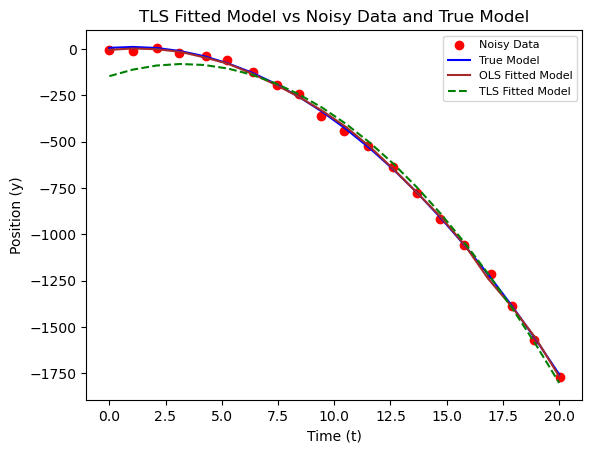

Last Singular Value = 9.901443082715717 1.7037051052382282
Ax = y
Noise added to A [Forward Operator] = N(0, 0.5) and y [True Data] = N(0, 1)
True values: y0 = 5, u = 10, a = -9.8
TLS fitted values: y0 = -1679.805, u = 353.542, a = -38.952
OLS Fitted values: y0 = -10.135, u = 16.346, a = -10.716


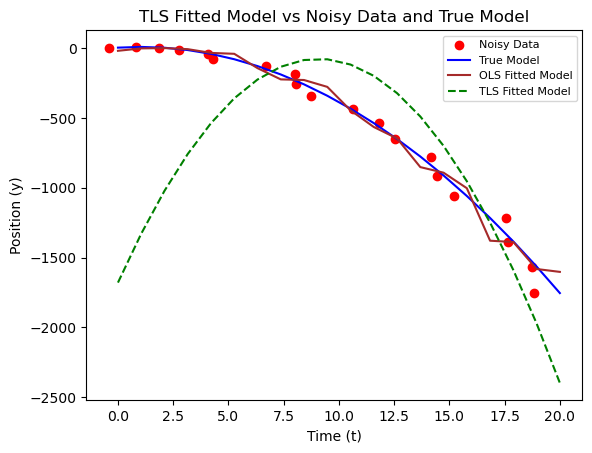

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

np.random.seed(14)
# Given parameters
y0_true = 5    # Initial position
u_true = 10    # Initial velocity
a_true = -9.8  # Acceleration (gravitational constant)

# Number of samples
n_samples = 20

# Generate time values (t) evenly spaced
t = np.linspace(0, 20, n_samples)
y_true = y0_true + u_true * t + 0.5 * a_true * t**2

Sigma_t = [0.05 , 0.05 , 0.5]
Sigma_y = [0.5 , 10 , 1 ] 
for i , j in zip(Sigma_t , Sigma_y):
    # Add Noise to the data and model(Forward Operator)
    t_noisy = t + np.random.normal(0, i, size=n_samples)  
    y_noisy = y_true + np.random.normal(0, j, size=n_samples)

    # Form Forward operator by concatinating colms 
    A_noisy = np.column_stack([np.ones_like(t_noisy), t_noisy, 0.5 * t_noisy**2])
    b = y_noisy 
    
    # OLS Method (Ordinary Least Square Method )
    m_ols = np.linalg.inv(A_noisy.T@A_noisy)@A_noisy.T@y_noisy
    y_ols = A_noisy@m_ols

    # TLS Method (Total Least Square Method)

    # Augment the matrix A_noisy with b
    D_noisy = np.hstack([A_noisy, b.reshape(-1, 1)])
    U, S, Vt = svd(D_noisy)
    print('Last Singular Value =' ,S[-2] , S[-1])
    V = Vt.T
    tls_solution = -V[:-1, -1] / V[-1, -1]  
    
    # Extract the fitted parameters
    y0_tls, u_tls, a_tls = tls_solution
    
    # Print the results
    print('Ax = y' )
    print(f'Noise added to A [Forward Operator] = N(0, {i}) and y [True Data] = N(0, {j})')
    print(f"True values: y0 = {y0_true}, u = {u_true}, a = {a_true}")
    print(f"TLS fitted values: y0 = {y0_tls:.3f}, u = {u_tls:.3f}, a = {a_tls:.3f}")
    print(f'OLS Fitted values: y0 = {m_ols[0]:.3f}, u = {m_ols[1]:.3f}, a = {m_ols[2]:.3f}')
    
    y_tls = y0_tls + u_tls * t + 0.5 * a_tls * t**2
    
    # Plot the  data
    plt.scatter(t_noisy, y_noisy, label='Noisy Data', color='red')
    plt.plot(t, y_true, label='True Model', color='blue')
    plt.plot(t, y_ols, label='OLS Fitted Model', color='brown')
    plt.plot(t, y_tls, label='TLS Fitted Model', color='green', linestyle='--')
    plt.xlabel('Time (t)')
    plt.ylabel('Position (y)')
    plt.legend(fontsize = 8)
    plt.title('TLS Fitted Model vs Noisy Data and True Model')
    plt.show()
    


### Comparison on OLS,TLS AND HUBER LOSS

Ax = y
Noise added to y [True Data] = N(0,0.5)
True values: y0 = 5, u = 10, a = -9.8
Huber fitted values: y0 = -0.606, u = 17.109, a = -10.753
OLS Fitted values: y0 = 107.151, u = 4.080, a = -9.551


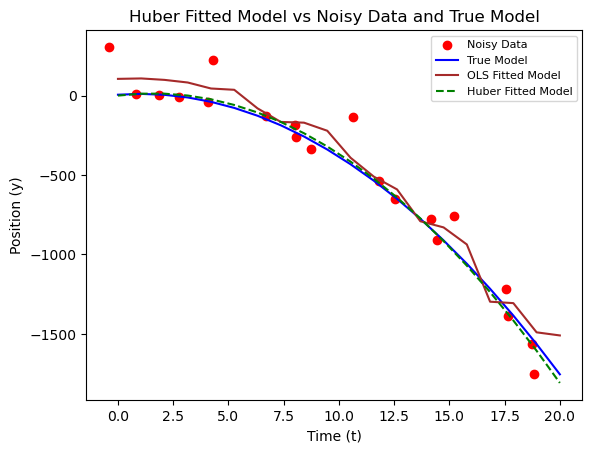

Ax = y
Noise added to y [True Data] = N(0,2)
True values: y0 = 5, u = 10, a = -9.8
Huber fitted values: y0 = 0.766, u = 17.457, a = -10.803
OLS Fitted values: y0 = 107.378, u = 4.164, a = -9.570


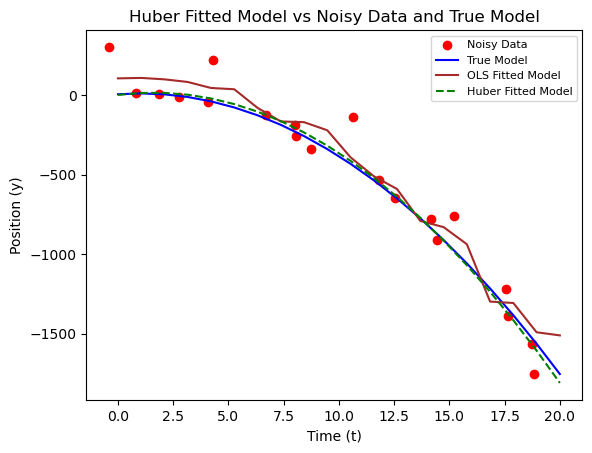

Ax = y
Noise added to y [True Data] = N(0,10)
True values: y0 = 5, u = 10, a = -9.8
Huber fitted values: y0 = -4.975, u = 18.090, a = -10.901
OLS Fitted values: y0 = 108.629, u = 3.373, a = -9.478


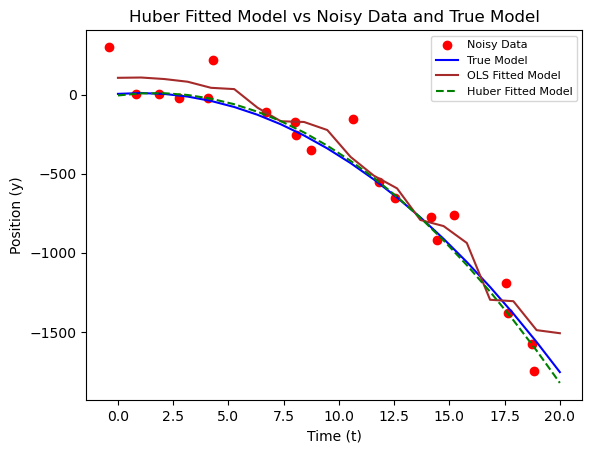

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
np.random.seed(14)

# Given parameters
y0_true = 5    # Initial position
u_true = 10    # Initial velocity
a_true = -9.8  # Acceleration (gravitational constant)

# Number of samples
n_samples = 20

# Generate time values (t) evenly spaced
t = np.linspace(0, 20, n_samples)
y_true = y0_true + u_true * t + 0.5 * a_true * t**2


Sigma_y = [0.5, 2 , 10]

def huber_loss(params, t, y_noisy, delta=1.0):
    y0, u, a = params
    y_pred = y0 + u * t + 0.5 * a * t**2
    residuals = y_noisy - y_pred
    
    # Huber loss calculation
    loss = np.where(np.abs(residuals) <= delta, 
                    0.5 * residuals**2, 
                    delta * (np.abs(residuals) - 0.5 * delta))
    return np.sum(loss)

for j in Sigma_y:
    # Add noise to the data and model (Forward Operator)
    y_noisy = y_true + np.random.normal(0, j, size=n_samples)

    # Add outliers to y_noisy
    y_noisy[::5] += 300  # Adding larger outliers every 5th point

    # Form Forward operator by concatenating columns 
    A= np.column_stack([np.ones_like(t), t, 0.5 * t**2])
    b = y_noisy 
    
    # OLS Method (Ordinary Least Square Method)
    m_ols = np.linalg.inv(A.T @ A) @ A.T @ y_noisy
    y_ols = A_noisy @ m_ols

    # Huber Regression
    initial_guess = [0, 0, 0]  # Initial guess for the parameters y0, u, a
    result = minimize(huber_loss, initial_guess, args=(t_noisy, y_noisy), method='BFGS')
    huber_params = result.x
    y0_huber, u_huber, a_huber = huber_params
    
    # Print the results
    print('Ax = y')
    print(f'Noise added to y [True Data] = N(0,{j})')
    print(f"True values: y0 = {y0_true}, u = {u_true}, a = {a_true}")
    print(f"Huber fitted values: y0 = {y0_huber:.3f}, u = {u_huber:.3f}, a = {a_huber:.3f}")
    print(f'OLS Fitted values: y0 = {m_ols[0]:.3f}, u = {m_ols[1]:.3f}, a = {m_ols[2]:.3f}')
    
    # Predictions for Huber model
    y_huber = y0_huber + u_huber * t + 0.5 * a_huber * t**2
    
    # Plot the data
    plt.scatter(t_noisy, y_noisy, label='Noisy Data', color='red')
    plt.plot(t, y_true, label='True Model', color='blue')
    plt.plot(t, y_ols, label='OLS Fitted Model', color='brown')
    plt.plot(t, y_huber, label='Huber Fitted Model', color='green', linestyle='--')
    plt.xlabel('Time (t)')
    plt.ylabel('Position (y)')
    plt.legend(fontsize=8)
    plt.title('Huber Fitted Model vs Noisy Data and True Model')
    plt.show()